In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
data = pd.read_csv('C:/Users/apaks/Desktop/Data Science/Python/Python Playground/Projects/Machine Learning Projects/Loan Data from Lending Club/data/preprocessing_stage_3.csv', index_col=0)

In [5]:
data.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,interest_rate,is_renter,state_grouped,log_transformed_annual_income,...,never_late_payment,delinq_risk_category,log_total_debit_limit,log_num_active_debit_accounts,has_bankruptcy,loan_purpose,application_type,loan_amount,installment,interest_rate.2
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,14.07,0,NJ,11.407576,...,0,Moderate Risk,9.314790,1.098612,0,other,individual,28000,652.53,14.07
1,10.0,HI,RENT,40000.0,Not Verified,5.04,12.61,1,other,10.596660,...,1,Perfect,9.711176,1.386294,1,debt_consolidation,individual,5000,167.54,12.61
2,3.0,WI,RENT,40000.0,Source Verified,21.15,17.09,1,other,10.596660,...,0,Moderate Risk,8.366603,1.386294,0,other,individual,2000,71.40,17.09
3,1.0,PA,RENT,30000.0,Not Verified,10.16,6.72,1,other,10.308986,...,1,Perfect,9.873080,1.098612,0,debt_consolidation,individual,21600,664.19,6.72
4,10.0,CA,RENT,35000.0,Verified,57.96,14.07,1,CA,10.463132,...,1,Perfect,10.395161,2.397895,0,credit_card,joint,23000,786.87,14.07


In [8]:
data.columns

Index(['emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'interest_rate', 'is_renter',
       'state_grouped', 'log_transformed_annual_income',
       'log_transformed_debit_to_income', 'months_since_last_delinq',
       'inquiries_last_12m', 'months_since_90d_late', 'accounts_opened_24m',
       'num_active_debit_accounts', 'total_debit_limit', 'num_mort_accounts',
       'account_never_delinq_percent', 'public_record_bankrupt',
       'interest_rate.1', 'square_months_since_last_delinq',
       'never_late_payment', 'delinq_risk_category', 'log_total_debit_limit',
       'log_num_active_debit_accounts', 'has_bankruptcy', 'loan_purpose',
       'application_type', 'loan_amount', 'installment', 'interest_rate.2'],
      dtype='object')

In [9]:
data.drop(columns = ['interest_rate', 'interest_rate.1'], inplace = True)

In [11]:
data.rename(columns = {'interest_rate.2': 'interest_rate'}, inplace = True)

In [12]:
data.columns

Index(['emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'is_renter', 'state_grouped',
       'log_transformed_annual_income', 'log_transformed_debit_to_income',
       'months_since_last_delinq', 'inquiries_last_12m',
       'months_since_90d_late', 'accounts_opened_24m',
       'num_active_debit_accounts', 'total_debit_limit', 'num_mort_accounts',
       'account_never_delinq_percent', 'public_record_bankrupt',
       'square_months_since_last_delinq', 'never_late_payment',
       'delinq_risk_category', 'log_total_debit_limit',
       'log_num_active_debit_accounts', 'has_bankruptcy', 'loan_purpose',
       'application_type', 'loan_amount', 'installment', 'interest_rate'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9900 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   emp_length                       9900 non-null   float64
 1   state                            9900 non-null   object 
 2   homeownership                    9900 non-null   object 
 3   annual_income                    9900 non-null   float64
 4   verified_income                  9900 non-null   object 
 5   debt_to_income                   9900 non-null   float64
 6   is_renter                        9900 non-null   int64  
 7   state_grouped                    9900 non-null   object 
 8   log_transformed_annual_income    9900 non-null   float64
 9   log_transformed_debit_to_income  9900 non-null   float64
 10  months_since_last_delinq         9900 non-null   float64
 11  inquiries_last_12m               9900 non-null   int64  
 12  months_since_90d_late    

split dataset into raw_features and transformed_features

In [15]:
raw_features = data.drop(columns = ['log_transformed_annual_income', 'log_transformed_debit_to_income', 'is_renter', 'state_grouped', 'square_months_since_last_delinq', 'never_late_payment', 'delinq_risk_category', 'log_total_debit_limit', 'log_num_active_debit_accounts', 'has_bankruptcy'])

In [16]:
raw_features

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,months_since_last_delinq,inquiries_last_12m,months_since_90d_late,accounts_opened_24m,num_active_debit_accounts,total_debit_limit,num_mort_accounts,account_never_delinq_percent,public_record_bankrupt,loan_purpose,application_type,loan_amount,installment,interest_rate
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,38.0,6,38.0,5,2,11100,1,92.9,0,other,individual,28000,652.53,14.07
1,10.0,HI,RENT,40000.0,Not Verified,5.04,119.0,1,129.0,11,3,16500,0,100.0,1,debt_consolidation,individual,5000,167.54,12.61
2,3.0,WI,RENT,40000.0,Source Verified,21.15,28.0,4,28.0,13,3,4300,0,93.5,0,other,individual,2000,71.40,17.09
3,1.0,PA,RENT,30000.0,Not Verified,10.16,119.0,0,129.0,1,2,19400,0,100.0,0,debt_consolidation,individual,21600,664.19,6.72
4,10.0,CA,RENT,35000.0,Verified,57.96,119.0,7,129.0,6,10,32700,0,100.0,0,credit_card,joint,23000,786.87,14.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,TX,RENT,108000.0,Source Verified,22.28,119.0,5,129.0,8,4,44600,1,100.0,1,other,individual,24000,744.90,7.35
9996,8.0,PA,MORTGAGE,121000.0,Verified,32.38,9.0,1,9.0,0,5,28200,2,82.1,0,debt_consolidation,individual,10000,366.72,19.03
9997,10.0,CT,MORTGAGE,67000.0,Verified,45.26,6.0,0,129.0,4,5,14900,2,72.2,0,debt_consolidation,joint,30000,1175.10,23.88
9998,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,119.0,1,129.0,2,1,46000,6,100.0,0,other,individual,24000,722.76,5.32


In [17]:
transformed_features = data.drop(columns = ['annual_income', 'debt_to_income', 'homeownership', 'state', 'months_since_last_delinq', 'account_never_delinq_percent', 'months_since_90d_late', 'total_debit_limit', 'num_active_debit_accounts', 'public_record_bankrupt'])

## Check for Multicolinearity

Raw Features 

In [22]:
num_features = raw_features.select_dtypes(include = ['float64', 'int64'])

<Axes: >

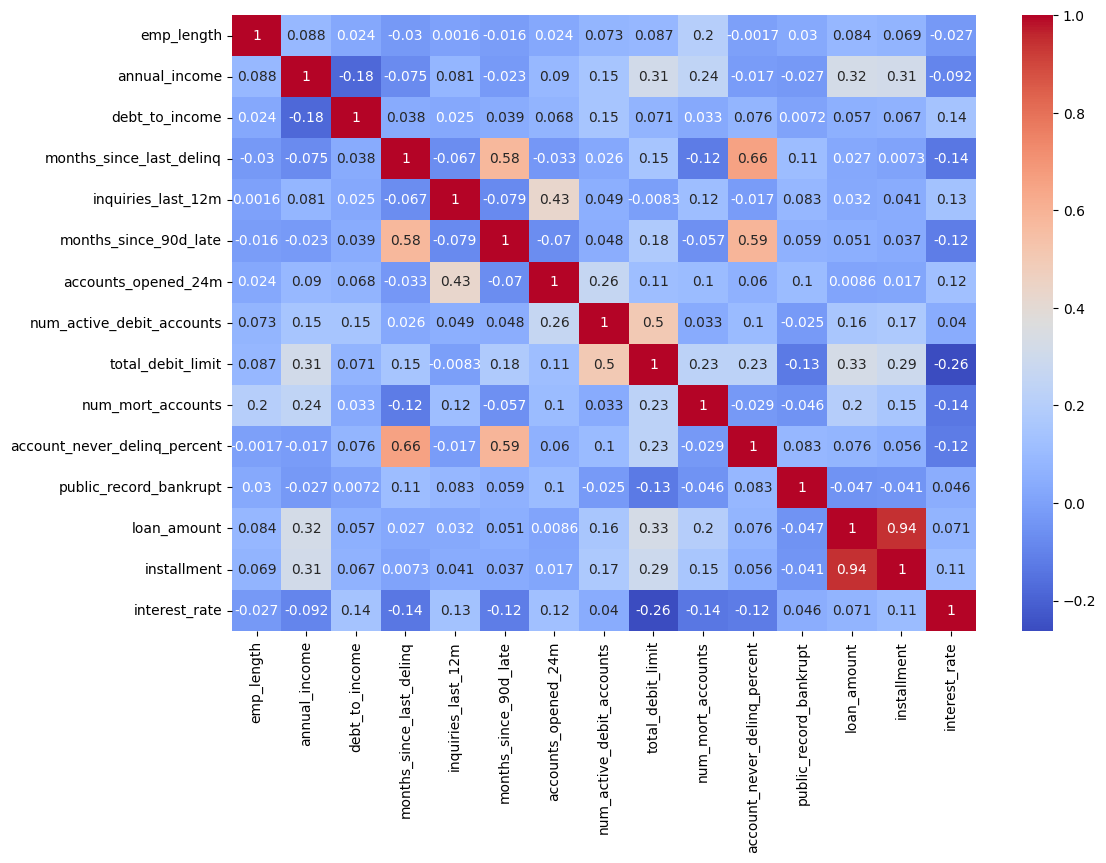

In [31]:
plt.figure(figsize=(12, 8))

sns.heatmap(num_features.corr(), cmap= 'coolwarm', annot= True)

In [34]:
data.drop(columns = 'installment', inplace = True)

In [35]:
raw_features.drop(columns = 'installment', inplace = True)
transformed_features.drop(columns = 'installment', inplace = True)

Check vif

In [46]:
num_features
X = num_features.drop(columns = 'interest_rate')    #drop target column
X = sm.add_constant(X)  #add intercept for statsmodel

# calculate vif
vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


           VIF
0   158.712267
1     1.052393
2     1.304925
3     1.092714
4     2.016608
5     1.249652
6     1.725427
7     1.358189
8     1.477338
9     1.711396
10    1.197061
11    2.074348
12    1.059295
13    1.220105


Check condition number

In [50]:
X.drop(columns = 'const')

,emp_length,annual_income,debt_to_income,months_since_last_delinq,inquiries_last_12m,months_since_90d_late,accounts_opened_24m,num_active_debit_accounts,total_debit_limit,num_mort_accounts,account_never_delinq_percent,public_record_bankrupt,loan_amount
0,3.0,90000.0,18.01,38.0,6,38.0,5,2,11100,1,92.9,0,28000
1,10.0,40000.0,5.04,119.0,1,129.0,11,3,16500,0,100.0,1,5000
2,3.0,40000.0,21.15,28.0,4,28.0,13,3,4300,0,93.5,0,2000
3,1.0,30000.0,10.16,119.0,0,129.0,1,2,19400,0,100.0,0,21600
4,10.0,35000.0,57.96,119.0,7,129.0,6,10,32700,0,100.0,0,23000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,108000.0,22.28,119.0,5,129.0,8,4,44600,1,100.0,1,24000
9996,8.0,121000.0,32.38,9.0,1,9.0,0,5,28200,2,82.1,0,10000
9997,10.0,67000.0,45.26,6.0,0,129.0,4,5,14900,2,72.2,0,30000
9998,1.0,80000.0,11.99,119.0,1,129.0,2,1,46000,6,100.0,0,24000


In [ ]:
np.linalg.cond(X)       # too high because of scalling 

np.float64(1319036.447962872)

In [60]:
# scalling the X matrix
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X.drop(columns = 'const'))
scaled_data

np.linalg.cond(scaled_data) 

np.float64(2.716432482077883)

In [ ]:
X.drop()

,const,emp_length,annual_income,debt_to_income,months_since_last_delinq,inquiries_last_12m,months_since_90d_late,accounts_opened_24m,num_active_debit_accounts,total_debit_limit,num_mort_accounts,account_never_delinq_percent,public_record_bankrupt,loan_amount
0,1.0,3.0,90000.0,18.01,38.0,6,38.0,5,2,11100,1,92.9,0,28000
1,1.0,10.0,40000.0,5.04,119.0,1,129.0,11,3,16500,0,100.0,1,5000
2,1.0,3.0,40000.0,21.15,28.0,4,28.0,13,3,4300,0,93.5,0,2000
3,1.0,1.0,30000.0,10.16,119.0,0,129.0,1,2,19400,0,100.0,0,21600
4,1.0,10.0,35000.0,57.96,119.0,7,129.0,6,10,32700,0,100.0,0,23000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,10.0,108000.0,22.28,119.0,5,129.0,8,4,44600,1,100.0,1,24000
9996,1.0,8.0,121000.0,32.38,9.0,1,9.0,0,5,28200,2,82.1,0,10000
9997,1.0,10.0,67000.0,45.26,6.0,0,129.0,4,5,14900,2,72.2,0,30000
9998,1.0,1.0,80000.0,11.99,119.0,1,129.0,2,1,46000,6,100.0,0,24000


Transformed Features

Correlation check

In [63]:
num_features = transformed_features.select_dtypes(['int64', 'float64'])

<Axes: >

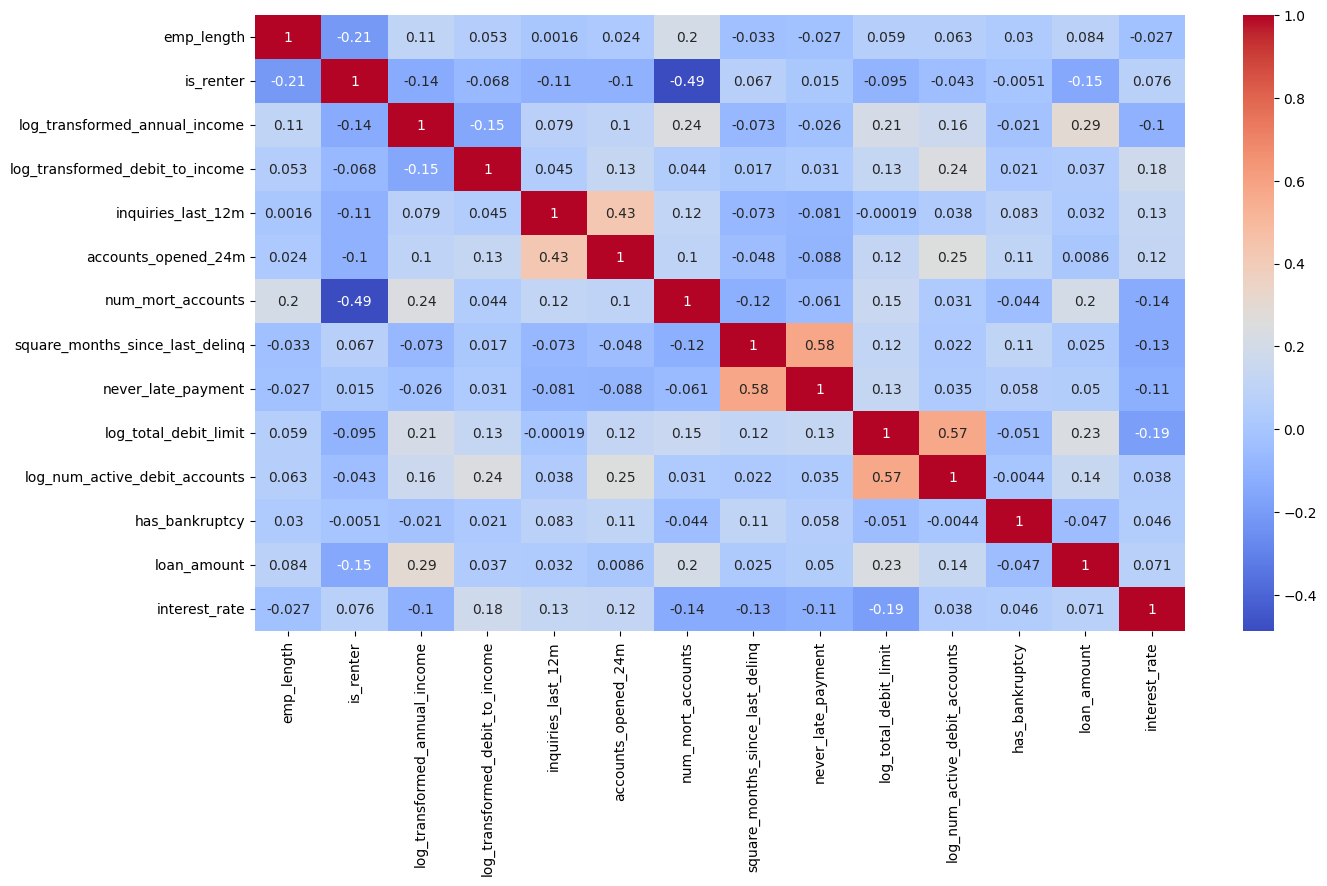

In [66]:
plt.figure(figsize=(15, 8))
sns.heatmap(num_features.corr(), cmap = 'coolwarm', annot= True)

VIF check

In [73]:
X = num_features.drop(columns = 'interest_rate')
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


           VIF
0   281.381467
1     1.073236
2     1.349882
3     1.238673
4     1.130848
5     1.249302
6     1.345551
7     1.439029
8     1.557095
9     1.533508
10    1.630621
11    1.657536
12    1.038851
13    1.163586


In [78]:
X.drop(columns = 'const', inplace = True)

Condition number check 

In [80]:
np.linalg.cond(X)

np.float64(64860.920050798115)

In [79]:
# scalling the data 
scaller = StandardScaler()
scalled_data = scaller.fit_transform(X)

print(np.linalg.cond(scalled_data))

2.4782129175835697


## Creating a pipeline for scalling and encoding

In [84]:
transformed_data = transformed_features.copy()

In [90]:
transformed_data.head()

,emp_length,verified_income,is_renter,state_grouped,log_transformed_annual_income,log_transformed_debit_to_income,inquiries_last_12m,accounts_opened_24m,num_mort_accounts,square_months_since_last_delinq,never_late_payment,delinq_risk_category,log_total_debit_limit,log_num_active_debit_accounts,has_bankruptcy,loan_purpose,application_type,loan_amount,interest_rate
0,3.0,Verified,0,NJ,11.407576,2.944965,6,5,1,1444.0,0,Moderate Risk,9.314790,1.098612,0,other,individual,28000,14.07
1,10.0,Not Verified,1,other,10.596660,1.798404,1,11,0,14161.0,1,Perfect,9.711176,1.386294,1,debt_consolidation,individual,5000,12.61
2,3.0,Source Verified,1,other,10.596660,3.097837,4,13,0,784.0,0,Moderate Risk,8.366603,1.386294,0,other,individual,2000,17.09
3,1.0,Not Verified,1,other,10.308986,2.412336,0,1,0,14161.0,1,Perfect,9.873080,1.098612,0,debt_consolidation,individual,21600,6.72
4,10.0,Verified,1,CA,10.463132,4.076859,7,6,0,14161.0,1,Perfect,10.395161,2.397895,0,credit_card,joint,23000,14.07


In [104]:
num_features = [
    'emp_length', 'is_renter', 'log_transformed_annual_income', 'log_transformed_debit_to_income', 'inquiries_last_12m', 'accounts_opened_24m', 'num_mort_accounts', 'square_months_since_last_delinq', 'never_late_payment', 'log_total_debit_limit', 'log_num_active_debit_accounts', 'has_bankruptcy', 'loan_amount'
]

cat_features = [
    'verified_income', 'state_grouped', 'delinq_risk_category', 'loan_purpose', 'application_type'
]

# Transformers 
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

Train test split

In [105]:
X = transformed_data.drop(columns = 'interest_rate')
y = transformed_data['interest_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

Applying LR with pipeline

In [106]:
lr = LinearRegression()

In [107]:
model = Pipeline(steps = [
    ('preprocessor', preprocessor),     #scaling and encoding
    ('regression', lr)      #linear regression
])

model.fit(X_train, y_train)

#evaluate
y_pred = model.predict(X_test)
print('R2 score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

R2 score:  0.2136717586415664
MSE:  19.97710342658873


Trying Regularisation to check if it improves the scores. 

In [112]:
#ridge

ridge = Ridge(alpha = 0.01)

model = Pipeline(steps = [
    ('preprocessor', preprocessor),     #scaling and encoding
    ('regression', ridge)      #ridge regression
])

model.fit(X_train, y_train)

#evaluate
y_pred = model.predict(X_test)
print('R2 score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

R2 score:  0.21367185726708848
MSE:  19.97710092095285


In [114]:
# ridge cv

ridge = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100])

model = Pipeline(steps = [
    ('preprocessor', preprocessor),     #scaling and encoding
    ('regression', ridge)      #ridge regression
])

model.fit(X_train, y_train)

#evaluate
y_pred = model.predict(X_test)
print('R2 score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

R2 score:  0.21375182624825495
MSE:  19.975069264802585


In [121]:
# lasso 

lasso = LassoCV(alphas = [0.01, 0.1, 1, 10], cv=5)

model = Pipeline(steps = [
    ('preprocessor', preprocessor),     #scaling and encoding
    ('regression', lasso)      #lassoCV regression
])

model.fit(X_train, y_train)

#evaluate
y_pred = model.predict(X_test)
print('R2 score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))


R2 score:  0.2131740184572083
MSE:  19.989748790979192


In [124]:
lasso_model = model.named_steps['regression']

len(lasso_model.coef_)

31

In [126]:
len(X_train.columns)

18

In [127]:
feature_names = model.named_steps["preprocessor"].get_feature_names_out()

In [128]:
feature_names

array(['num__emp_length', 'num__is_renter',
       'num__log_transformed_annual_income',
       'num__log_transformed_debit_to_income', 'num__inquiries_last_12m',
       'num__accounts_opened_24m', 'num__num_mort_accounts',
       'num__square_months_since_last_delinq', 'num__never_late_payment',
       'num__log_total_debit_limit', 'num__log_num_active_debit_accounts',
       'num__has_bankruptcy', 'num__loan_amount',
       'cat__verified_income_Source Verified',
       'cat__verified_income_Verified', 'cat__state_grouped_FL',
       'cat__state_grouped_GA', 'cat__state_grouped_IL',
       'cat__state_grouped_NJ', 'cat__state_grouped_NY',
       'cat__state_grouped_OH', 'cat__state_grouped_TX',
       'cat__state_grouped_other', 'cat__delinq_risk_category_Low Risk',
       'cat__delinq_risk_category_Moderate Risk',
       'cat__delinq_risk_category_Perfect',
       'cat__loan_purpose_debt_consolidation',
       'cat__loan_purpose_home_improvement',
       'cat__loan_purpose_major_pur

In [129]:
coef_df = pd.DataFrame({
    'features' : feature_names,
    'coefficients': lasso_model.coef_
}
)

In [134]:
coef_df[coef_df['coefficients'] == 0]

,features,coefficients
16,cat__state_grouped_GA,0.0
17,cat__state_grouped_IL,-0.0
20,cat__state_grouped_OH,0.0
21,cat__state_grouped_TX,-0.0
24,cat__delinq_risk_category_Moderate Risk,0.0


In [135]:
coef_df.to_csv('C:/Users/apaks/Desktop/Data Science/Python/Python Playground/Projects/Machine Learning Projects/Loan Data from Lending Club/data/coef_df_after_lr.csv')